Compute a test statistic that would show that 1 model does better than the other.
LS and WLS

For example, if you picked LS and WLS, you would compute a statistic for each model, and show that one of those test statistics is better than the otherat different scenarios and datasets. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 

plt.rcParams["figure.figsize"]=(14,9) #Figure size and width

In [12]:
df = pd.read_csv("M2. module_2_data.csv")
df.head()

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016


### 1. OLS - Ordinary Least Square Method

In this data we are assuming:
Dependent Value : "DXY"
Independent Value : "METALS","OIL","US\_STK","INTL\_STK","X13W\_TB","X10Y\_TBY","EURUSD"

In [18]:
#Scatterplot, Histogram, and Correlation graph matrix for Exogenous Variables and Endogeneous Variables
def corr(x,y,**kwargs):
    coef = np.corrcoeff(x,y)[0][1] # Calculate the value
    label = r"$\rho$ ="+ str(rand(coef,2)) # make the label
    # Add the label to the plot 
    ax=plt.gca()
    ax.annotate(label,xy=(0.3,0.15),size=20,xycoords=ax.transAxes)

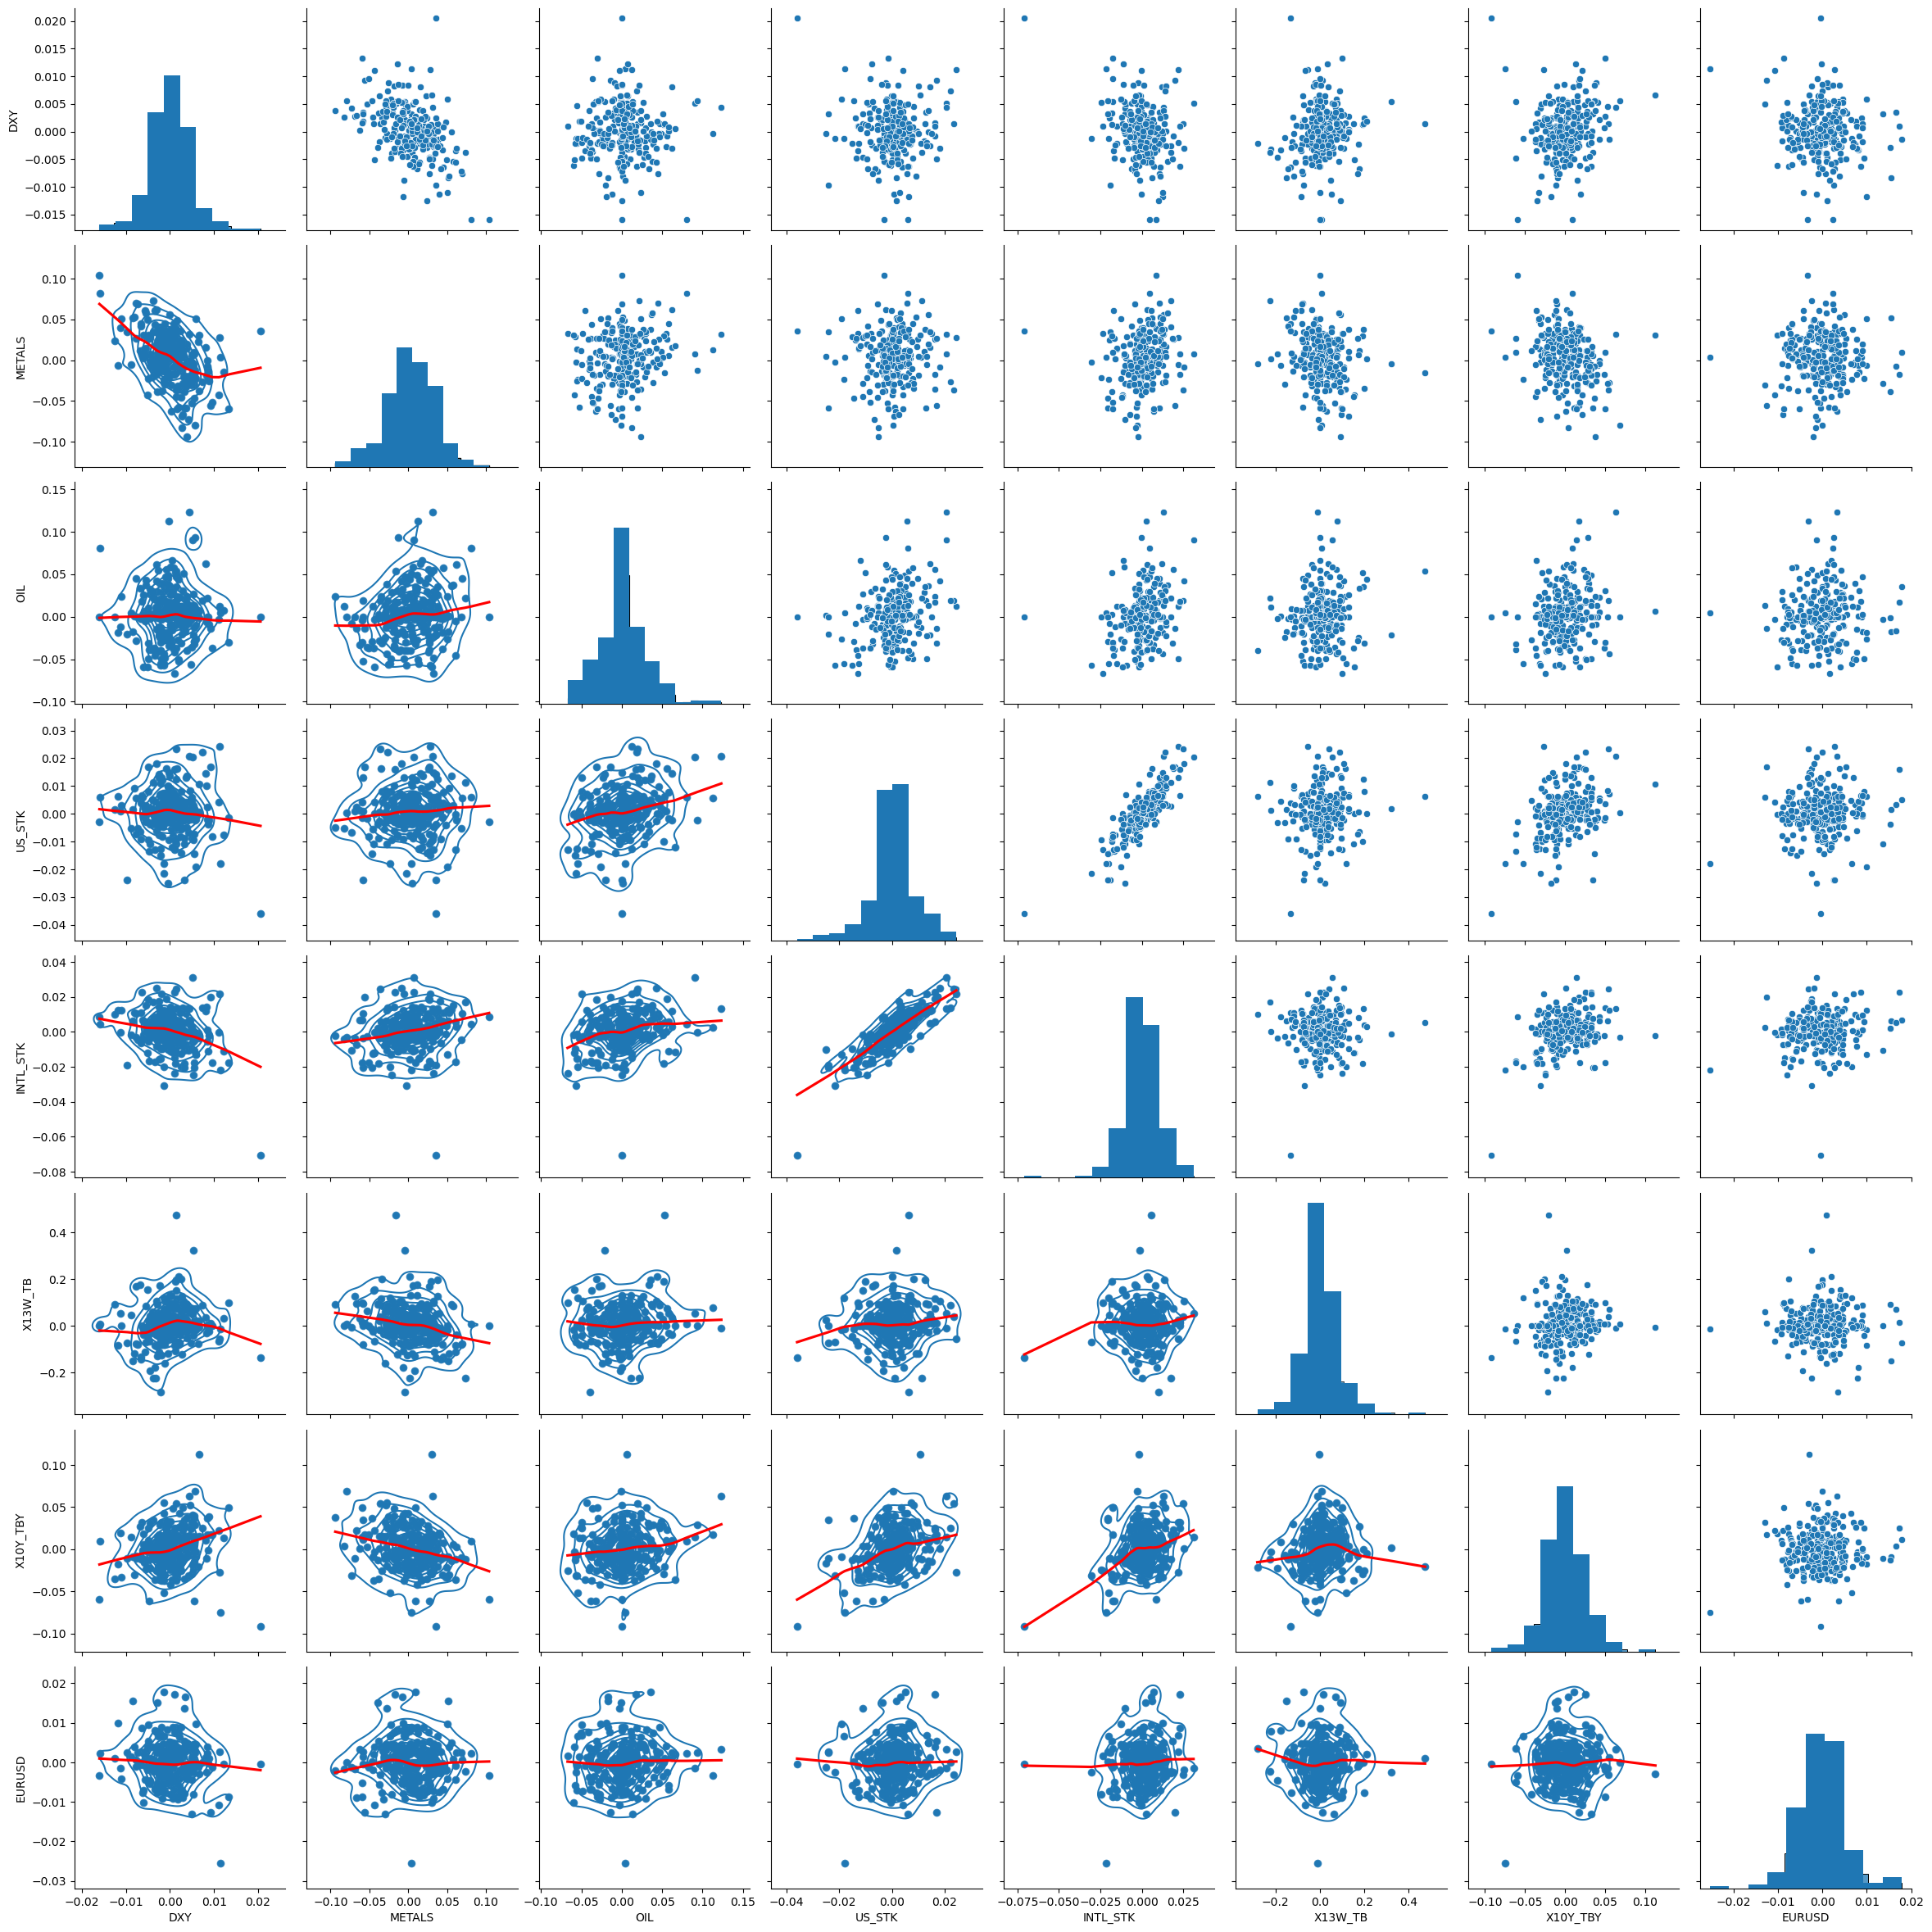

In [19]:
# Create a default pairplot
grid = sns.pairplot(df,vars=["DXY","METALS","OIL","US_STK","INTL_STK","X13W_TB","X10Y_TBY","EURUSD"],height=3)
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist)

# Map a density plot and regression line to the lower triangle
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess=True, line_kws={"color": "red"})

Observations :
1. The upper right triangle of the matrix showcases the correlation values of all two-way correlation value of all two way combinations.
2. The lower left triangle of the matrix showcases the scatterplots for all the two way combinations of all the variables.
3. The graph of the diagonal of the matrix are the histogram of all variables. 

In [41]:
#Linear regression result 
model = smf.ols("DXY ~ METALS+OIL+US_STK+INTL_STK+X13W_TB+X10Y_TBY+EURUSD",data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DXY   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     21.31
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           2.72e-22
Time:                        00:13:49   Log-Likelihood:                 1043.0
No. Observations:                 250   AIC:                            -2070.
Df Residuals:                     242   BIC:                            -2042.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.747      0.4

IN ORDER TO COMPARE THE OLS AND WLS REGRESSION MODEL WE ARE SELECTING ONE INDEPENDENT VARIABLE AS A DEFAULT PARAMETER "X10Y\_TBY"

In [42]:
#Linear regression result 
model_1 = smf.ols("DXY ~ X10Y_TBY",data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    DXY   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.738
Date:                Tue, 26 Aug 2025   Prob (F-statistic):            0.00582
Time:                        00:14:07   Log-Likelihood:                 986.78
No. Observations:                 250   AIC:                            -1970.
Df Residuals:                     248   BIC:                            -1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      0.474      0.6

In [43]:
#Parameters with 6 significant digits 
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.000141,0.000297,0.474101,0.635845,-0.000444,0.000725
X10Y_TBY,0.033568,0.012067,2.781725,0.005823,0.009800,0.057336


The estimate from the above variables result showcases that:
1. If the Oil increase by 0.01 or 1% the value for DXY will increase by 0.019497 or (~ 1.95%). 
2. Whereas, the (Independent variable) P-values < 0.05, has more significant or impact over the (Dependent Varaible) 
As a repercussion, the independent variable with p-value greater than the designated parameter can be remove from the model to increase the model efficacy.

### 2. WLS - Weighted Least Square Regression

#### 2.1 Scatter Plot for OLS Fitted Values and OLS Residual 

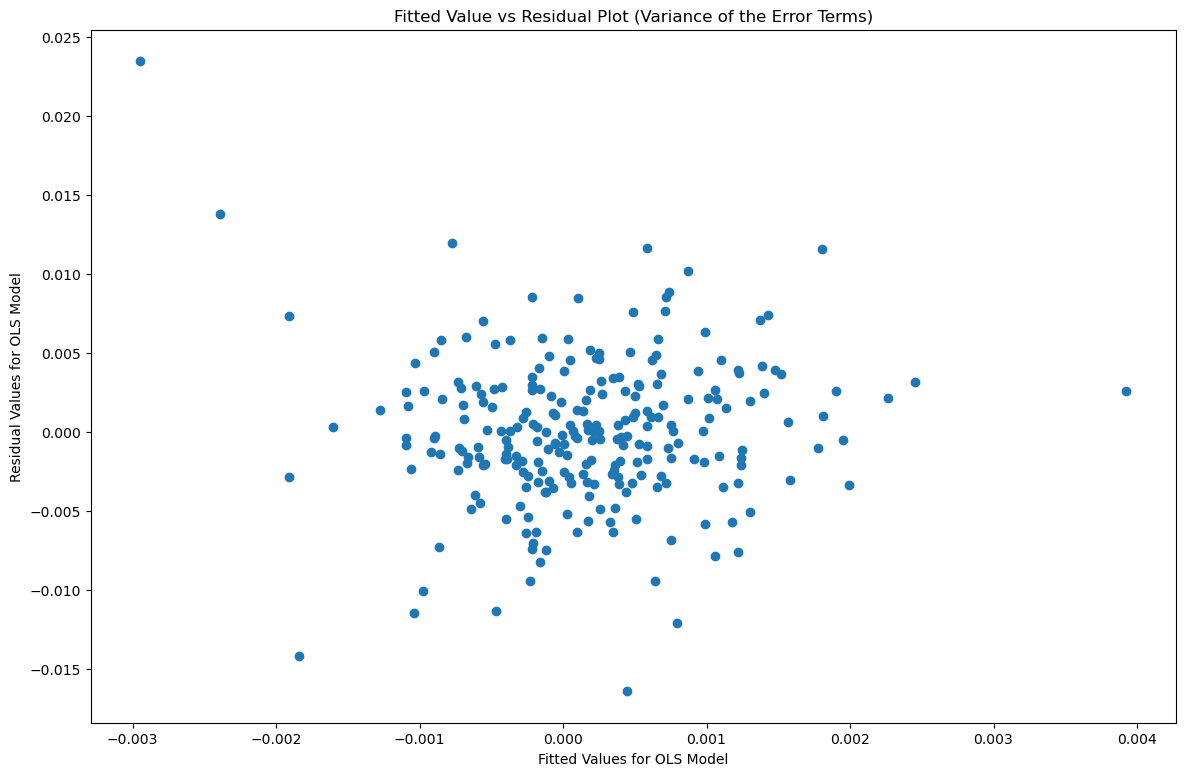

In [44]:
# Scatter Plot for OLS Fitted Value and OLS Residuals 

#Calculate the fitted Value and Residuals 
model_1fitted = model_1.fittedvalues
model_1residual = model_1.resid

plt.scatter(x=model_1fitted,y=model_1residual)
plt.title("Fitted Value vs Residual Plot (Variance of the Error Terms)")
plt.xlabel("Fitted Values for OLS Model")
plt.ylabel("Residual Values for OLS Model")
plt.show()

The conclusion draw from this sccatter plot about the presense of heteroskedasticity is somewhat ambigous. However, from visual aid it has been clear that there is a clear low concentration of the scatter point when we move from 0 towards positive values. Although, to double confirm we will run Breusch-Pagan test. 

#### 2.2 Breusch-Pagan Test

In [45]:
# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

,
Lagrange multiplier statistic,13.897238
p-value,0.000193
f-value,14.597521
f p-value,0.000168


It is confirmed that the model_1 consists of the Heteroskedasticity as the p-value is less than 0.005. As a repercussion we can eliminate the Null Hypothesis, that the model consists Homoscedasticity.

#### 2.3 WLS Reggression Result 

In [47]:
# Add absolute Residuals and Fitted Values to dataset columns 
df["abs_residuals"]=np.abs(model_1.resid)
df["fitted_values"]=model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values 
model_temp = smf.ols("abs_residuals ~ fitted_values",data=df).fit()

#Compute the weights and add it to the dataset columns
weights = model_temp.fittedvalues
weights = weights**-2
df["weights"]=weights

#Fit WLS Model 
Y = df["DXY"].tolist()
X = df["X10Y_TBY"].tolist()
X = sm.add_constant(X) # Add the intercept point

model_2 = sm.WLS(Y,X,df["weights"]).fit()
print(model_2.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            WLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     27.59
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           3.23e-07
Time:                        00:24:55   Log-Likelihood:                 994.52
No. Observations:                 250   AIC:                            -1985.
Df Residuals:                     248   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.346      0.7

Observations :
1. The "X10Y_TBY" stil has a positive coefficient and coefficient is still significant.
2. The R squared value has also improved from 0.3 to 0.10. It implies that the independent variable more accurately explains the movement of dependent variable in the WLS Regression Model as compared to the OLS Regression Model.  